In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
#nltk.download("stopwords")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
columns = ['app_id', 'recommendationid', 'author', 'language', 'review', 
           'timestamp_created', 'timestamp_updated', 'voted_up', 'votes_up', 
           'votes_funny', 'weighted_vote_score', 'comment_count', 'steam_purchase', 
           'received_for_free', 'written_during_early_access']

In [2]:
df = pd.read_csv('/Users/alison/Desktop/GA/DSI15-lessons/project/project-capstone/Capstone Steam/data/download/clean_dlc_reviews.csv', 
                      encoding= 'utf-8')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48359 entries, 0 to 48358
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   48359 non-null  int64  
 1   app_id                       48359 non-null  int64  
 2   dlc                          48359 non-null  int64  
 3   recommendationid             48359 non-null  int64  
 4   review                       48359 non-null  object 
 5   voted_up                     48359 non-null  bool   
 6   votes_up                     48359 non-null  int64  
 7   votes_funny                  48359 non-null  int64  
 8   weighted_vote_score          48359 non-null  float64
 9   comment_count                48359 non-null  int64  
 10  received_for_free            48359 non-null  bool   
 11  written_during_early_access  48359 non-null  bool   
 12  review_created               48359 non-null  object 
 13  review_updated  

In [6]:
df.drop(columns='Unnamed: 0', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48359 entries, 0 to 48358
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   app_id                       48359 non-null  int64  
 1   dlc                          48359 non-null  int64  
 2   recommendationid             48359 non-null  int64  
 3   review                       48359 non-null  object 
 4   voted_up                     48359 non-null  bool   
 5   votes_up                     48359 non-null  int64  
 6   votes_funny                  48359 non-null  int64  
 7   weighted_vote_score          48359 non-null  float64
 8   comment_count                48359 non-null  int64  
 9   received_for_free            48359 non-null  bool   
 10  written_during_early_access  48359 non-null  bool   
 11  review_created               48359 non-null  object 
 12  review_updated               48359 non-null  object 
 13  steamid         

In [8]:
df['review_length'] = df['review'].map(lambda x: len(x))

In [11]:
df.rename(columns = {'voted_up': 'positive', 'votes_up': 'helpful'},  
          inplace = True) 

In [12]:
df[df['review_length'] < 5]

,app_id,dlc,recommendationid,review,positive,helpful,votes_funny,weighted_vote_score,comment_count,received_for_free,...,review_created,review_updated,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,last_played,playtime_at_review,review_length
37,1257,1,68405889,­,True,3,0,0.498219,0,False,...,2020-05-02 03:46:23,2020-05-02 03:46:23,76561198016046767,1428,1026,0,0,0,NaN,1
81,8990,1,81642701,1,True,1,0,0.508929,0,False,...,2020-12-05 07:56:52,2020-12-05 07:56:52,76561198391162178,104,92,0,0,0,NaN,1
112,10195,1,55674289,good,True,0,1,0.476190,0,False,...,2019-10-19 18:07:47,2019-10-19 18:07:47,76561198018368274,51,15,0,0,0,NaN,4
127,10195,1,3370608,22,True,0,0,0.000000,0,False,...,2012-03-13 10:49:04,2012-03-13 10:49:04,76561198021595195,7,4,0,0,0,NaN,2
153,10196,1,18688577,lol?,False,3,3,0.439503,0,False,...,2015-10-26 01:06:42,2015-10-26 01:06:42,76561198208706336,23,10,0,0,0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48121,611420,1,47239592,Yes,True,1,2,0.441886,0,False,...,2018-12-01 19:18:27,2018-12-01 19:18:27,76561198032714722,622,245,0,0,0,NaN,3
48253,614582,1,40013635,ok,True,0,0,0.356312,0,True,...,2018-02-11 23:07:52,2018-02-11 23:07:52,76561198354408761,8,6,0,0,0,NaN,2
48255,614582,1,45539672,-,False,2,0,0.151677,0,False,...,2018-10-31 13:47:51,2018-10-31 13:47:51,76561198101757581,26,70,0,0,0,NaN,1
48321,616190,1,42696724,+1,True,2,0,0.453120,0,False,...,2018-06-13 11:45:11,2018-06-13 11:45:11,76561198038757354,621,481,0,0,0,NaN,2


In [ ]:
#some of these reviews which are voted helpful don't seem to be very helpful - ironic voting?

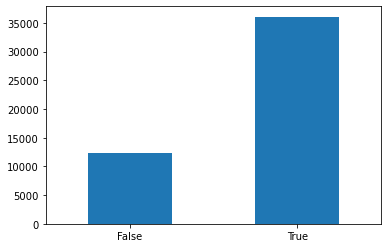

In [20]:
df.positive.value_counts(sort=False).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
#class imbalance

<AxesSubplot:ylabel='Frequency'>

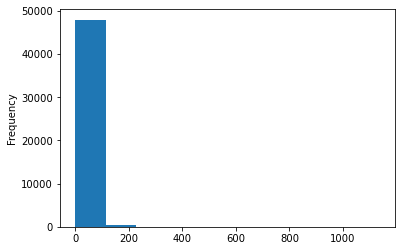

In [24]:
df['helpful'].plot.hist()

<AxesSubplot:>

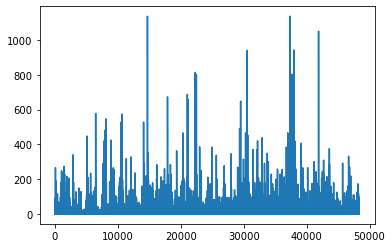

In [25]:
df['helpful'].plot.line()

In [26]:
df.helpful.describe()

count    48359.000000
mean         9.030253
std         28.378406
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max       1137.000000
Name: helpful, dtype: float64

In [17]:
df.nlargest(10,'helpful')

,app_id,dlc,recommendationid,review,positive,helpful,votes_funny,weighted_vote_score,comment_count,received_for_free,...,review_created,review_updated,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,last_played,playtime_at_review,review_length
14701,292982,1,12490368,Tried to create my own kingdom as a tribe in R...,True,1137,255,0.839304,10,False,...,2014-10-14 17:25:30,2014-10-14 17:25:30,76561198086457938,76,1,0,0,0,NaN,373
37389,292982,1,12490368,Tried to create my own kingdom as a tribe in R...,True,1137,255,0.839302,10,False,...,2014-10-14 17:25:30,2014-10-14 17:25:30,76561198086457938,76,1,0,0,0,NaN,373
41888,521220,1,26035924,You're on the store page for Endless Legend: T...,True,1051,62,0.901928,50,False,...,2016-10-14 20:34:38,2016-10-15 01:36:16,76561198017263948,127,11,0,0,0,NaN,4562
38008,426321,1,24031587,I have reviewed each DLC individually as they ...,False,943,10,0.934756,1,False,...,2016-07-02 23:39:39,2016-07-02 23:39:39,76561197982087969,332,23,0,0,0,NaN,2597
30555,426321,1,24031587,I have reviewed each DLC individually as they ...,False,941,9,0.934626,1,False,...,2016-07-02 23:39:39,2016-07-02 23:39:39,76561197982087969,332,23,0,0,0,NaN,2597
22284,349830,1,15625820,The people at overkill finally lost it...\n\nT...,False,814,58,0.722988,28,False,...,2015-04-30 17:47:57,2015-04-30 17:47:57,76561198037716772,241,13,0,0,0,NaN,332
22474,351890,1,14671364,(Edited for less opinion and more bottom-line....,False,803,34,0.877079,11,False,...,2015-02-27 04:44:24,2016-06-28 01:55:46,76561198059770327,482,12,0,0,0,NaN,787
37672,351890,1,14671364,(Edited for less opinion and more bottom-line....,False,803,34,0.877081,11,False,...,2015-02-27 04:44:24,2016-06-28 01:55:46,76561198059770327,482,12,0,0,0,NaN,787
14699,292982,1,12562007,"Just got the Charlemagne DLC, i started to pla...",True,688,672,0.884055,0,False,...,2014-10-19 04:38:39,2014-10-19 23:06:26,76561198026686520,218,1,0,0,0,NaN,602
21040,343460,1,14736818,I find it hard to recommend this. While it add...,False,687,12,0.924011,9,False,...,2015-03-04 23:05:07,2015-03-04 23:05:07,76561198005966045,245,10,0,0,0,NaN,615


In [29]:
rev_df = df[['review', 'positive', 'helpful', 'weighted_vote_score', 'review_length']]

In [30]:
rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48359 entries, 0 to 48358
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   review               48359 non-null  object 
 1   positive             48359 non-null  bool   
 2   helpful              48359 non-null  int64  
 3   weighted_vote_score  48359 non-null  float64
 4   review_length        48359 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 1.5+ MB


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


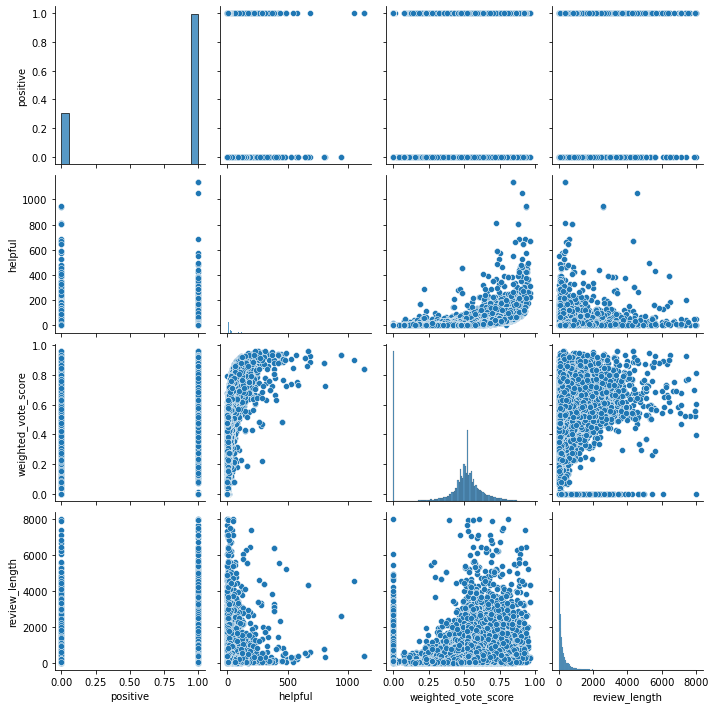

In [31]:
sns.pairplot(rev_df)

In [39]:
rev_df.reset_index(drop=True, inplace=True)

In [40]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [43]:
rev_df['reviewtxt'] = rev_df['review'].apply(get_text_processing)
rev_df.head()

<ipython-input-43-7dfb040d8f14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev_df['reviewtxt'] = rev_df['review'].apply(get_text_processing)


,review,positive,helpful,weighted_vote_score,review_length,reviewtxt
0,"I got this back in 2010 and it was around $2, ...",False,51,0.781742,175,got back 2010 around 2 8 four skins Dont get w...
1,DJ Scully nuff said.,True,23,0.707484,20,DJ Scully nuff said
2,These Killing Floor characters really adds to ...,True,22,0.659986,963,Killing Floor characters really adds attitude ...
3,Guy in a HaZmat suit... cool\nSome guy with so...,True,7,0.593850,176,Guy HaZmat suit cool guy cool armour nice Soun...
4,This DLC has the best looking character models...,True,9,0.591672,62,DLC best looking character models Buy one


In [47]:
X = rev_df['reviewtxt'].values
y = rev_df['helpful'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [54]:
pipe = make_pipeline(TfidfVectorizer(stop_words='english',
                                      max_features=10000,
                                      norm='l2'
                                      ),
                      LogisticRegression(),
                      )
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(cross_val_score(pipe, X_train, y_train, cv=5).mean())
print(pipe.score(X_test, y_test))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.35062479690407966


NameError: name 'cross_val_score' is not defined

In [56]:
print(pipe.score(X_train, y_train))
print(cross_val_score(pipe, X_train, y_train, cv=5).mean())
print(pipe.score(X_test, y_test))

0.35062479690407966


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data

0.2282059229483982
0.23194099807003032


In [ ]:
try l2 and not l1 for logisitc reg
do count vec first, then applying stemming

transpose countvet - aggregate across 

use model keywords to distinuish punct and uppercase

check distribution of positive/negative in each topic. compare group means